<p align="center">
  <img src="https://i.ytimg.com/vi/Wm8ftqDZUVk/maxresdefault.jpg" alt="FIUBA" width="25%"/>
  </p>
  
# **Trabajo Práctico 2: Críticas Cinematográficas**
### **Grupo**: 11 - Los Pandas 🐼
### **Cuatrimestre**: 2ºC 2023
### **Corrector**: Mateo Suster
### **Integrantes**:
- ### 106861 - Labollita, Francisco
- ### 102312 - Mundani Vegega, Ezequiel
- ###  97263 - Otegui, Matías Iñaki

# Pre-procesamiento de datos

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from unidecode import unidecode

In [39]:
#!pip install spacy
#!python -m spacy download es_core_news_sm
#!pip install unicode

In [40]:
# Se modifica el tamaño de los gráficos por defecto
plt.rcParams['figure.figsize'] = [4, 4]

In [41]:
# Cargar el modelo en español de spaCy
nlp = spacy.load('es_core_news_sm')

In [42]:
reviews_train = pd.read_csv('train.csv')
reviews_test = pd.read_csv('test.csv')

### Cantidad de reviews positivas y reviews negativas

#### Train

Cantidad de reviews totales:  50000
Cantidad de reviews positivas:  25000
Cantidad de reviews negativas:  25000


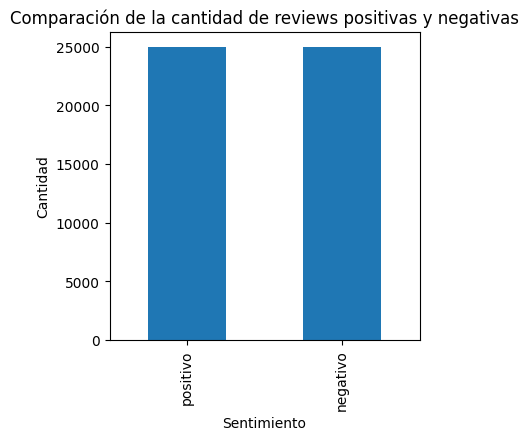

In [ ]:
count_train = reviews_train['sentimiento'].value_counts()

print('Cantidad de reviews totales: ', count_train.sum())
print('Cantidad de reviews positivas: ', count_train.iloc[0])
print('Cantidad de reviews negativas: ', count_train.iloc[1])

count_train.plot(kind='bar')
plt.title('Comparación de la cantidad de reviews positivas y negativas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

#### Test

In [44]:
count_test = reviews_test.value_counts()

print('Cantidad de reviews totales: ', count_test.sum())

Cantidad de reviews totales:  8599


### Limpiar datos

Se realiza un HTML Strip para eliminar las etiquetas HTML de un texto en caso de que haya algunas. También se eliminan los caracteres especiales que no sean letras (acentuadas o no), números o espacios. Se eliminan los espacios al principio y al final del texto. Se convierte todo el texto a minúsculas para dar uniformidad y reducir la dimensionalidad.  

Luego, con la librería spaCy se eliminan las StopWord (pronombres, conjunciones, etc...) y se mantienen los acentos para que el proceso de lematización trabaje mejor. Se lematiza el texto para reducir la dimensionalidad y dar uniformidad.  

Finalmente, se quitan los tíldes.

In [45]:
# Realizar un HTML strip
reviews_train['review_es'] = reviews_train['review_es'].str.replace(
    '<.*?>', '', regex=True)
reviews_test['review_es'] = reviews_test['review_es'].str.replace(
    '<.*?>', '', regex=True)

# Reemplaza caracteres extraños que no sean letras (acentuadas o no), números o espacios por un espacio
reviews_train['review_es'] = reviews_train['review_es'].str.replace(
    '[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑçÇ0-9\\s]', '', regex=True)
reviews_test['review_es'] = reviews_test['review_es'].str.replace(
    '[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑçÇ0-9\\s]', '', regex=True)

# Eliminar los espacios al principio y al final de cada review
reviews_train['review_es'] = reviews_train['review_es'].str.strip()
reviews_test['review_es'] = reviews_test['review_es'].str.strip()

# Convertir todo a minúsculas
reviews_train['review_es'] = reviews_train['review_es'].str.lower()
reviews_test['review_es'] = reviews_test['review_es'].str.lower()

Se eliminan las stopwords en español con la librería spaCy.

In [46]:
# Función para eliminar stopwords
def eliminar_stopwords(texto):
    doc = nlp(texto)
    return ' '.join([token.text for token in doc if not token.is_stop])


# Aplicar la función para eliminar stopwords
reviews_train['review_es'] = reviews_train['review_es'].apply(eliminar_stopwords)
reviews_test['review_es'] = reviews_test['review_es'].apply(eliminar_stopwords)

Se realiza el proceso de lematización de las reviews para disminuir la dimensionalidad, mejorar la precisión y normalizar el texto.

In [47]:
# Función para lematizar texto
def lematizar(texto):
    doc = nlp(texto)
    return ' '.join([token.lemma_ for token in doc])


# Aplicar la función para lematizar la columna 'review_es'
reviews_train['review_es'] = reviews_train['review_es'].apply(lematizar)
reviews_test['review_es'] = reviews_test['review_es'].apply(lematizar)

Se quitan los tildes.

In [49]:
reviews_train['review_es'] = reviews_train['review_es'].apply(
     lambda x: unidecode(x) if pd.notnull(x) else x)
reviews_test['review_es'] = reviews_test['review_es'].apply(
    lambda x: unidecode(x) if pd.notnull(x) else x)

### Exportar datos limpios

In [50]:
reviews_train.to_csv('train_clean.csv', index=False)
reviews_test.to_csv('test_clean.csv', index=False)